# Data Science amb Python

### Cristiane de Souza da Silva

### Sprint 7 : Tasca dades, probabilitats i estadístiques


#### Abril 2021

### Exercises 1

Grab a sports theme dataset you like and select an attribute from the dataset. Calculate the mode, median, standard deviation, and arithmetic mean.

### Dataset

The selected dataset contains information about the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016.


#### Attribute Information:


1. ID - Unique number for each athlete
2. Name - Athlete's name
3. Sex - M or F
4. Age - Integer
5. Height - In centimeters
6. Weight - In kilograms

In [1]:
# import libraries needed

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load dataset 
from datetime import datetime

df = pd.read_csv('athlete.csv', index_col = 'ID')

df.head()

,Name,Sex,Age,Height,Weight
ID,,,,,
1,A Dijiang,M,24.0,180.0,80.0
2,A Lamusi,M,23.0,170.0,60.0
3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN
4,Edgar Lindenau Aabye,M,34.0,NaN,NaN
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0


In [3]:
# show summary of Dataframe structure
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 1 to 135571
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Name    271116 non-null  object 
 1   Sex     271116 non-null  object 
 2   Age     261642 non-null  float64
 3   Height  210945 non-null  float64
 4   Weight  208241 non-null  float64
dtypes: float64(3), object(2)
memory usage: 12.4+ MB


In [4]:
# How many non-null entries

df.isnull().sum()

Name          0
Sex           0
Age        9474
Height    60171
Weight    62875
dtype: int64

In [5]:
# Remove missing values

df_clean = df.copy()

df_clean = df.dropna()
df_clean.head()

,Name,Sex,Age,Height,Weight
ID,,,,,
1,A Dijiang,M,24.0,180.0,80.0
2,A Lamusi,M,23.0,170.0,60.0
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0
5,Christine Jacoba Aaftink,F,25.0,185.0,82.0


In [6]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206165 entries, 1 to 135571
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Name    206165 non-null  object 
 1   Sex     206165 non-null  object 
 2   Age     206165 non-null  float64
 3   Height  206165 non-null  float64
 4   Weight  206165 non-null  float64
dtypes: float64(3), object(2)
memory usage: 9.4+ MB


In [7]:
# mean and standard deviation

df_clean.describe()

,Age,Height,Weight
count,206165.000000,206165.000000,206165.000000
mean,25.055509,175.371950,70.688337
std,5.483096,10.546088,14.340338
min,11.000000,127.000000,25.000000
25%,21.000000,168.000000,60.000000
50%,24.000000,175.000000,70.000000
75%,28.000000,183.000000,79.000000
max,71.000000,226.000000,214.000000


In [8]:
# Mode of each Age, Height and Weight columns

#Age
print('The mode of Age column is',
      df_clean['Age'].value_counts().index[0], 
      '\n')

#Height
print('The mode of Height column is',
      df_clean['Height'].value_counts().index[0], 
      '\n')

#Weight
print( 'The mode of Weight column is',
      df_clean['Weight'].value_counts().index[0])

The mode of Age column is 23.0 

The mode of Height column is 180.0 

The mode of Weight column is 70.0


In [9]:
# Median of each Age, Height and Weight columns

#Age
print('The median of Age column is',df_clean['Age'].median(),
      '\n')

#Height
print('The median of Height column is',df_clean['Height'].median(),
      '\n')

#Weight
print( 'The median of Weight column is',df_clean['Weight'].median())

The median of Age column is 24.0 

The median of Height column is 175.0 

The median of Weight column is 70.0


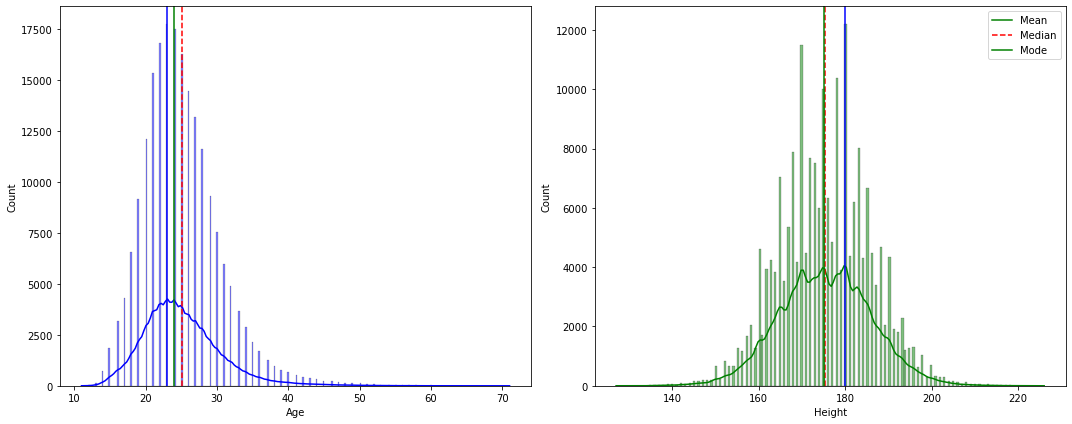

In [10]:
# Histogram for Age , Height and Weight


fig, (ax1, ax2) = plt.subplots(figsize=(15, 6), ncols=2)

mean_age=df_clean['Age'].mean()
median_age=df_clean['Age'].median()
mode_age=df_clean['Age'].value_counts().index[0]

mean_height=df_clean['Height'].mean()
median_height=df_clean['Height'].median()
mode_height=df_clean['Height'].value_counts().index[0]


#Histogram
sns.histplot(data=df_clean, x="Age", kde=True, color="blue",
             ax=ax1)
sns.histplot(data=df_clean, x="Height", kde=True, color="green",
             ax=ax2)


# Vertical lines of mean, median and mode
ax1.axvline(mean_age, color='r', linestyle='--')
ax1.axvline(median_age, color='g', linestyle='-')
ax1.axvline(mode_age, color='b', linestyle='-')

# Vertical lines of mean, median and mode
ax2.axvline(mean_height, color='r', linestyle='--')
ax2.axvline(median_height, color='g', linestyle='-')
ax2.axvline(mode_height, color='b', linestyle='-')

plt.legend({'Mean':mean_height,'Median':median_height,'Mode':mode_height})

plt.tight_layout()

plt.show()

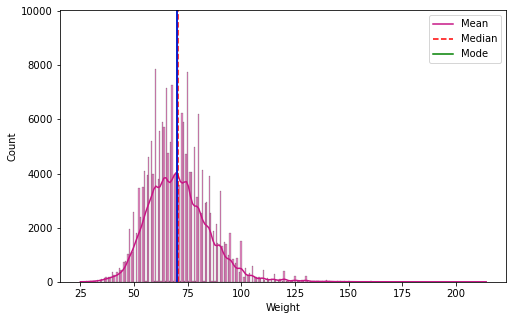

In [11]:
fig, ax3 = plt.subplots(figsize=(8, 5))

mean_weight=df_clean['Weight'].mean()
median_weight=df_clean['Weight'].median()
mode_weight=df_clean['Weight'].value_counts().index[0]


#Histogram
sns.histplot(data=df_clean, x="Weight", kde=True, color="mediumvioletred", 
             ax=ax3)


# Vertical lines of mean, median and mode
ax3.axvline(mean_weight, color='r', linestyle='--')
ax3.axvline(median_weight, color='g', linestyle='-')
ax3.axvline(mode_weight, color='b', linestyle='-')

plt.legend({'Mean':mean_weight,'Median':median_weight,'Mode':mode_weight})

plt.show()

### Exercises 2

Continuing with the sports topic data, select two attributes and calculate their correlation.

In [12]:
# Correlation between Height and Weight

df_clean['Height'].corr(df_clean['Weight']).round(4)

0.7966

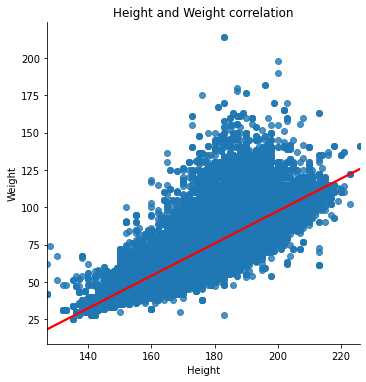

In [13]:
sns.lmplot(x="Height", y="Weight", data=df_clean,
           line_kws={'color': 'red'},ci=None)

plt.title('Height and Weight correlation')

plt.show()


###  Exercises 3
Continuing with the sports theme data, calculate the correlation of all attributes with each other and represent them in a matrix with different colors of intensity.

In [14]:
# Correlation of all atributes

df_clean.corr()

,Age,Height,Weight
Age,1.000000,0.141684,0.212041
Height,0.141684,1.000000,0.796573
Weight,0.212041,0.796573,1.000000


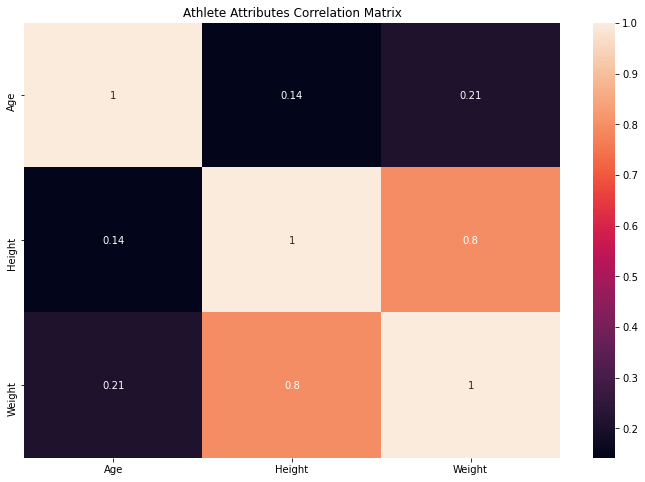

In [15]:
# Matrix correlation

plt.figure(figsize=(12,8))

sns.heatmap(df_clean.corr(), annot=True)
plt.title('Athlete Attributes Correlation Matrix')
plt.show()

###  Exercises 4
Continuing with the sports theme data, select an attribute and calculate the geometric mean and harmonic mean.

In [16]:
# Geometric mean of Weight attribute

from scipy.stats import gmean

gmean(df_clean['Weight']).round(2)

69.29

In [17]:
# Harmonic mean of Weight attribute

from scipy.stats import hmean

hmean(df_clean['Weight']).round(2)

67.92